In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Importing CSV Data
data = pd.read_csv("xAPI-Edu-Data.csv")

In [4]:
# Data Test
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


<AxesSubplot:>

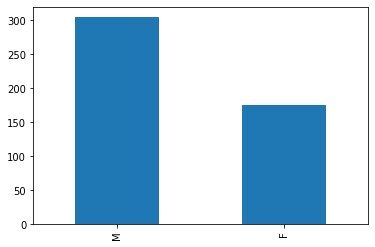

In [13]:
# Task 1 : Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?
data['gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

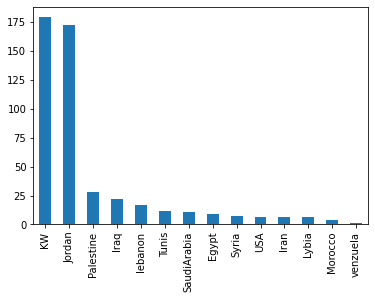

In [6]:
data['NationalITy'].value_counts().plot(kind='bar')

<AxesSubplot:>

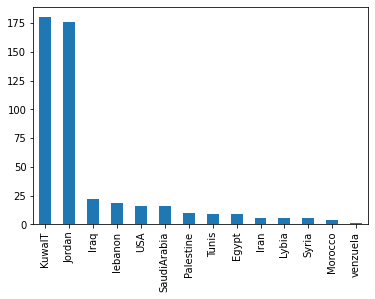

In [7]:
data['PlaceofBirth'].value_counts().plot(kind='bar')

<AxesSubplot:>

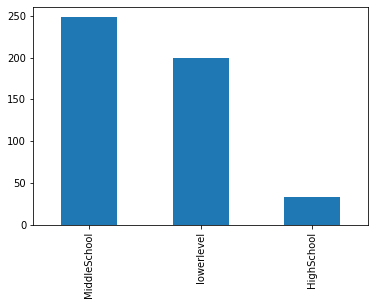

In [8]:
data['StageID'].value_counts().plot(kind='bar')

<AxesSubplot:>

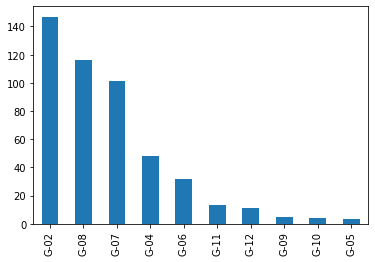

In [9]:
data['GradeID'].value_counts().plot(kind='bar')

<AxesSubplot:>

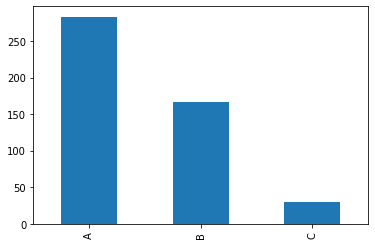

In [10]:
data['SectionID'].value_counts().plot(kind='bar')

<AxesSubplot:>

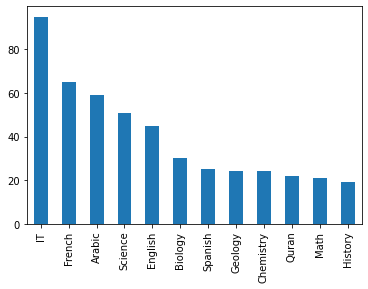

In [11]:
data['Topic'].value_counts().plot(kind='bar')

<AxesSubplot:>

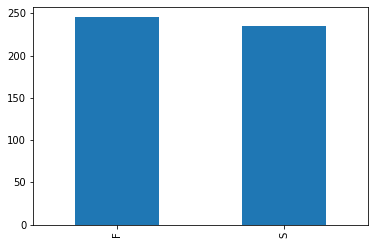

In [12]:
data['Semester'].value_counts().plot(kind='bar')

<AxesSubplot:>

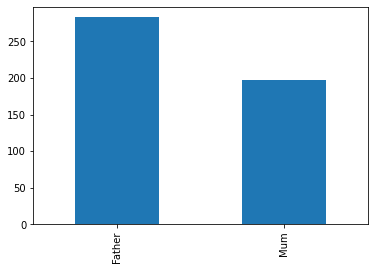

In [14]:
data['Relation'].value_counts().plot(kind='bar')

<AxesSubplot:>

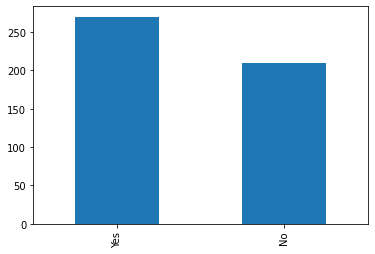

In [15]:
data['ParentAnsweringSurvey'].value_counts().plot(kind='bar')

<AxesSubplot:>

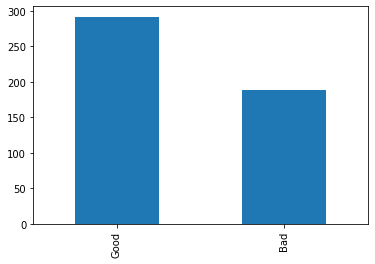

In [16]:
data['ParentschoolSatisfaction'].value_counts().plot(kind='bar')

<AxesSubplot:>

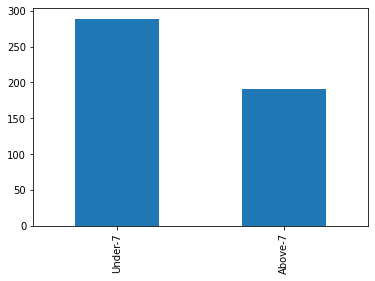

In [17]:
data['StudentAbsenceDays'].value_counts().plot(kind='bar')

<AxesSubplot:>

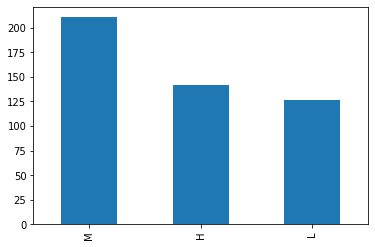

In [18]:
data['Class'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='PlaceofBirth', ylabel='count'>

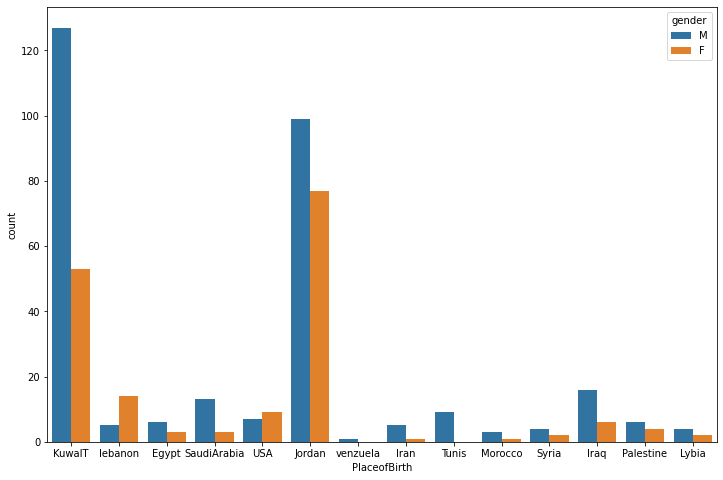

In [20]:
# Task 2 : Look at some categorical features in relation to each other, to see what insights could be possibly read?
plt.figure(figsize=(12,8))
sbn.countplot(x='PlaceofBirth',hue='gender',data=data)

<AxesSubplot:xlabel='Class', ylabel='count'>

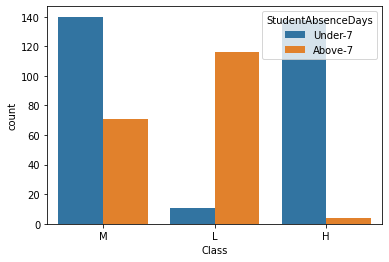

In [21]:
sbn.countplot(x='Class',hue='StudentAbsenceDays',data=data)

<AxesSubplot:xlabel='Class', ylabel='count'>

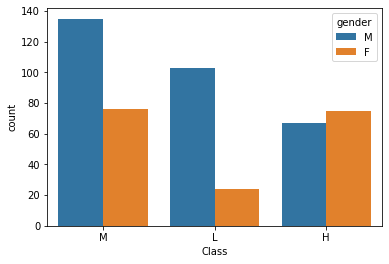

In [22]:
sbn.countplot(x='Class',hue='gender',data=data)

<AxesSubplot:xlabel='Class', ylabel='count'>

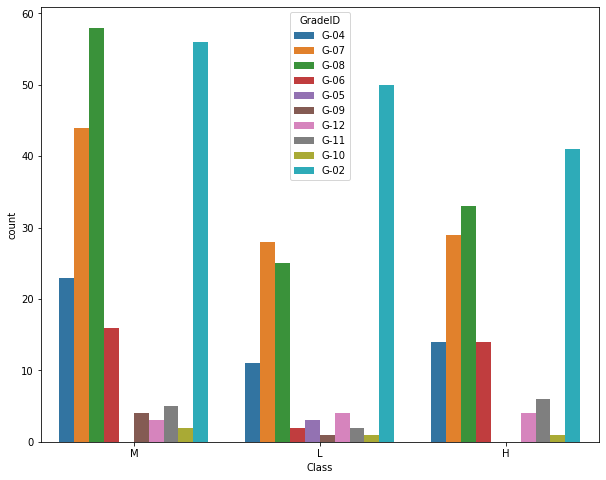

In [23]:
plt.figure(figsize=(10,8))
sbn.countplot(x='Class',hue='GradeID',data=data)

<AxesSubplot:xlabel='Class', ylabel='count'>

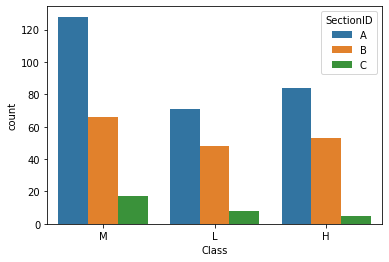

In [24]:
sbn.countplot(x='Class',hue='SectionID',data=data)

<AxesSubplot:xlabel='gender', ylabel='AnnouncementsView'>

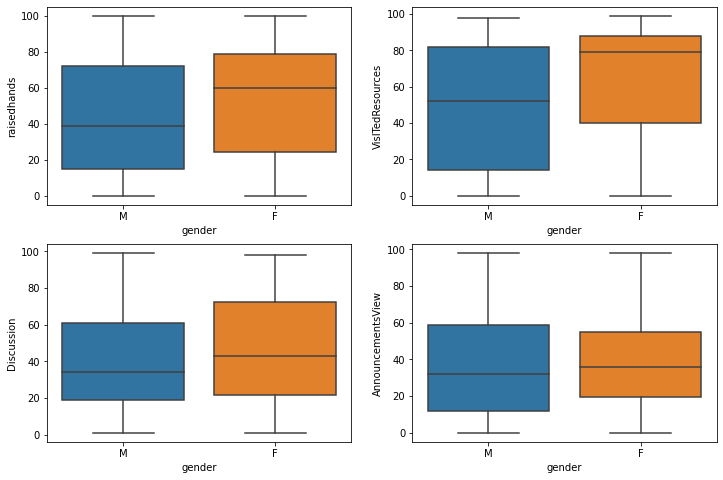

In [26]:
# Task 3: Visualize categorical variables with numerical variables and give conclusions?
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sbn.boxplot(x='gender', y='raisedhands', data=data)
plt.subplot(2,2,2)
sbn.boxplot(x='gender', y='VisITedResources', data=data)
plt.subplot(2,2,3)
sbn.boxplot(x='gender', y='Discussion', data=data)
plt.subplot(2,2,4)
sbn.boxplot(x='gender', y='AnnouncementsView', data=data)

<AxesSubplot:xlabel='Class', ylabel='count'>

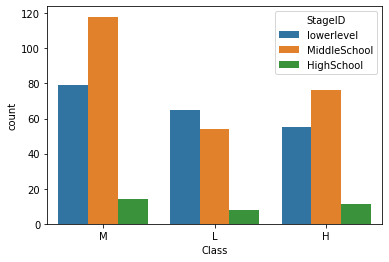

In [28]:
sbn.countplot(x='Class',hue='StageID',data=data)

c:\users\ansh walia\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Topic', ylabel='count'>

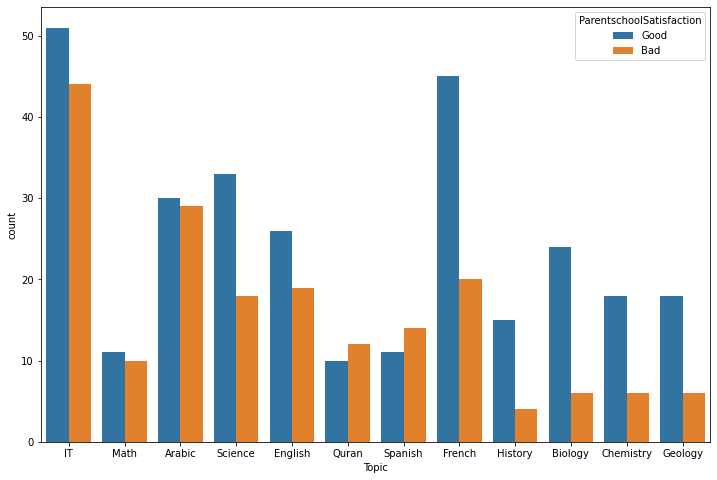

In [32]:
plt.figure(figsize=(12,8))
sbn.countplot('Topic', hue='ParentschoolSatisfaction', data=data)

In [33]:
# Task 3 Conclusion :
# 1. Female students generally score higher than their male counterparts.
# 2. Female students are more involved in classroom acrivities.

In [34]:
# Task 4 : From the above result, what are the factors that leads to get low grades of the students?

# Task 4 Conclusion :
# Students who are involved more in their classroom activities tend to score higher then those students which don't get involved into any classroom activities.

In [35]:
# Task 5 : Build classification model and present it's classification report?

# Dropping target/dependent variable
X = data.iloc[:,:-1]

In [37]:
# Data Test
X.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7


In [40]:
# Dependent Variable DataFrame
Y = data.iloc[:,-1:]

In [41]:
# Data Test
Y.head()

,Class
0,M
1,M
2,L
3,L
4,M


In [42]:
# ONE HOT ENCODING METHOD : CONVERTING CATEGORICAL VARIABLES INTO NUMBERS
X=pd.get_dummies(X,drop_first=True)

In [43]:
# Data Test
X.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [45]:
# Splittion given dataset into training and test datasets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [46]:
X_train.shape

(384, 60)

In [47]:
X_test.shape

(96, 60)

In [48]:
Y_train.shape

(384, 1)

In [49]:
Y_test.shape

(96, 1)

In [51]:
# Instantiating Logistic Regression Object
lr = LogisticRegression()

In [52]:
lr.fit(X_train,Y_train)

c:\users\ansh walia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\ansh walia\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# Predicting Y training dataset using X tarining dataset
Predicted_Y_train = lr.predict(X_train)

In [56]:
# Data Test
Predicted_Y_train

array(['L', 'M', 'M', 'M', 'L', 'M', 'L', 'H', 'M', 'L', 'L', 'L', 'M',
       'M', 'H', 'M', 'M', 'L', 'L', 'M', 'H', 'M', 'H', 'L', 'L', 'H',
       'M', 'M', 'H', 'M', 'M', 'M', 'M', 'L', 'H', 'H', 'H', 'M', 'M',
       'H', 'L', 'H', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'H', 'L', 'M',
       'L', 'M', 'M', 'H', 'H', 'M', 'H', 'M', 'L', 'M', 'H', 'L', 'L',
       'M', 'M', 'H', 'L', 'H', 'L', 'H', 'M', 'M', 'L', 'H', 'M', 'M',
       'L', 'L', 'H', 'L', 'H', 'L', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'L', 'L', 'M', 'H', 'H', 'L', 'M', 'H', 'M', 'L', 'M',
       'M', 'L', 'H', 'L', 'H', 'H', 'H', 'L', 'H', 'H', 'M', 'H', 'L',
       'L', 'L', 'H', 'M', 'L', 'L', 'L', 'M', 'L', 'H', 'H', 'M', 'H',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'H', 'M', 'M', 'M', 'L', 'M', 'M', 'H', 'H', 'M', 'L', 'L', 'M',
       'H', 'L', 'H', 'M', 'H', 'M', 'L', 'H', 'H', 'M', 'H', 'L', 'M',
       'M', 'H', 'H', 'M', 'M', 'M', 'M', 'L', 'L', 'H', 'L', 'H

In [62]:
# Predicting Y test dataset using X test dataset
Predicted_Y_test = lr.predict(X_test)

In [64]:
Predicted_Y_test

array(['L', 'L', 'M', 'M', 'H', 'M', 'M', 'L', 'M', 'L', 'M', 'M', 'L',
       'H', 'M', 'M', 'L', 'M', 'M', 'L', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'L', 'L', 'H', 'H', 'M', 'L', 'M', 'H', 'L', 'M',
       'L', 'L', 'M', 'H', 'M', 'M', 'M', 'M', 'H', 'L', 'M', 'H', 'L',
       'M', 'H', 'M', 'M', 'M', 'M', 'L', 'L', 'H', 'M', 'H', 'M', 'L',
       'H', 'H', 'L', 'M', 'M', 'H', 'M', 'L', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'H', 'H', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'M', 'H',
       'M', 'L', 'H', 'L', 'H'], dtype=object)

In [59]:
# Converting Y_test dataset to pandas dataframe
Y_test = pd.DataFrame(Y_test)

In [60]:
# Data Test
Y_test.head()

,Class
13,L
469,L
63,M
324,M
368,H


In [65]:
metrics.accuracy_score(Y_test,Predicted_Y_test)

0.6666666666666666

In [66]:
metrics.accuracy_score(Y_train,Predicted_Y_train)

0.8151041666666666